<a href="https://colab.research.google.com/github/bth0114/AIFFEL_DLThon_DKTC_online13/blob/main/notebooks/taehoon/EXP_augument_with_KcElECTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy
!pip install wandb

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 22.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 494.1/494.1 kB 24.1 MB/s eta 0:00:00


## Î™®Îìà Î∂àÎü¨Ïò§Í∏∞ Î∞è ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï

In [2]:
import os
import re
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import wandb
from wandb.integration.keras.callbacks import WandbMetricsLogger
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


True

In [3]:
#  GitHubÏóêÏÑú CSV ÌååÏùº Îã§Ïö¥Î°úÎìú
!mkdir -p data/raw_csv
!wget https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/raw_csv/merged_train.csv -O data/raw_csv/merged_train.csv

#  ÌòÑÏû¨ ÎîîÎ†âÌÜ†Î¶¨ Í∏∞Ï§Ä Í≤ΩÎ°ú ÏÑ§Ï†ï
current_dir = os.getcwd()
csv_dir = os.path.join(current_dir, 'data', 'raw_csv')
train_csv_path = os.path.join(csv_dir, 'merged_train.csv')

#  Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÌÖåÏä§Ìä∏
df = pd.read_csv(train_csv_path)
print("ÏÉòÌîå 5Í∞ú:")
print(df.head())

--2025-05-04 01:38:49--  https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/raw_csv/merged_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2547026 (2.4M) [application/octet-stream]
Saving to: ‚Äòdata/raw_csv/merged_train.csv‚Äô

data/raw_csv/merged 100%[===================>]   2.43M  --.-KB/s    in 0.01s   

2025-05-04 01:38:50 (228 MB/s) - ‚Äòdata/raw_csv/merged_train.csv‚Äô saved [2547026/2547026]

ÏÉòÌîå 5Í∞ú:
    idx      class                                       conversation
0  1516      Í∞àÏ∑® ÎåÄÌôî  Ïñ¥Ïù¥ Í∞ÄÎ∞© Ï¢ãÏùÄÎç∞!?\nÎÑ§!? Ïôú Í∑∏Îü¨ÏãúÏ£†\nÏïÑÎãà Ïö∞Î¶¨Í∞Ä Î∞•ÏùÑ Íµ∂Ïñ¥ÏÑú Ìé∏ÏùòÏ†ê ÎùºÎ©¥Ïù¥...
1  5078      ÏùºÎ∞ò ÎåÄÌôî  ÏöîÏ¶ò ÏùΩÍ≥† ÏûàÎäî Ï±Ö ÏûàÏñ¥?\nÍ∑∏Í±∞ Ï¢ãÏùÄ ÏÉùÍ∞ÅÏù¥Ïïº.\nÏ¢ãÏùÄ ÏãúÍ∞Ñ Î

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- Íµ¨ÎëêÏ†ê Ï†úÍ±∞
- Î™ÖÏÇ¨, ÎèôÏÇ¨, ÌòïÏö©ÏÇ¨, Î∂ÄÏÇ¨, Ïà´ÏûêÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌÜ†ÌÅ∞Ìôî
- ÏµúÎåÄ Í∏∏Ïù¥Î•º Í∏∞Ï§ÄÏúºÎ°ú Ìå®Îî©

In [4]:
INPUT_MAX_LENGTH = 350  # ÏûÖÎ†• ÏãúÌÄÄÏä§ ÏµúÎåÄ Í∏∏Ïù¥
NUM_WORDS = 7000 # ÌÜ†ÌÅ∞ÌôîÏóê ÏÇ¨Ïö©Ìï† Îã®Ïñ¥ Í∞ØÏàò
EMBEDDING_DIM = 64  # ÏûÑÎ≤†Îî© Ï∞®Ïõê

In [33]:
df = pd.read_csv(train_csv_path)
ordered_columns = ['ÌòëÎ∞ï ÎåÄÌôî', 'Í∞àÏ∑® ÎåÄÌôî', 'ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî', 'Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî', 'ÏùºÎ∞ò ÎåÄÌôî'] # kaggleÏóê Î™ÖÏãúÎêú ÏàúÏÑúÎ°ú Ïû¨Î∞∞Ïπò

conversations = df['conversation'].to_list() # input
labels = pd.get_dummies(df['class'])
labels = labels[ordered_columns].to_numpy() # target

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
train_paths = {
    "conversations_aihub": "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/raw_csv/conversations_aihub.csv",
    "merged_train": "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/raw_csv/merged_train.csv",
    "merged_train_train": "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/raw_csv/merged_train_train.csv",
    "merged_train_val": "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/raw_csv/merged_train_val.csv",
    "aug_synonym_train_only" : "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/aug_csv/aug_synonym_train_only.csv",
    "aug_KoEDA_train_only":"https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/aug_csv/aug_KoEDA_train_only.csv",
    "aug_plus": "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/aug_csv/aug_plus_train.csv",
    "aug_synonym": "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/aug_csv/aug_synonym_train_only.csv",
    "eda_only": "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/aug_csv/eda_only.csv",
    "final_allclass": "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/aug_csv/final_train_allclass_eda.csv"
}

# Ï†úÏ∂úÏö© test Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
test_url = "https://raw.githubusercontent.com/bth0114/AIFFEL_DLThon_DKTC_online13/main/data/raw_csv/test.csv"

In [35]:
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_merged_train_train = pd.read_csv(train_paths["merged_train_train"])
df_merged_train_val = pd.read_csv(train_paths["merged_train_val"])
df_conversations_aihub = pd.read_csv(train_paths["conversations_aihub"])
df_syn = pd.read_csv(train_paths["aug_synonym"])
df_eda = pd.read_csv(train_paths["eda_only"])
df_syn_only = pd.read_csv(train_paths["aug_synonym_train_only"])
df_eda_only = pd.read_csv(train_paths["aug_KoEDA_train_only"])

In [36]:
# 2. ÎùºÎ≤® Ïù∏ÏΩîÎî©

# ÏõêÌïòÎäî Ï†ïÏàò ÏàúÏÑú ÏßÄÏ†ï
custom_label_order = {
    'ÌòëÎ∞ï ÎåÄÌôî': 0,
    'Í∞àÏ∑® ÎåÄÌôî': 1,
    'ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî': 2,
    'Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî': 3,
    'ÏùºÎ∞ò ÎåÄÌôî': 4
}

# Ïõê-Ìï´Ïù¥ ÏïÑÎãàÎùº Î¨∏ÏûêÏó¥ ÌÅ¥ÎûòÏä§Ïù∏ Í≤ΩÏö∞ Î∞îÎ°ú Ï†ïÏàòÎ°ú Î≥ÄÌôò
y_train_int = df_merged_train_train['class'].map(custom_label_order).values
y_val_int = df_merged_train_val['class'].map(custom_label_order).values

In [37]:
#label_names = ['ÌòëÎ∞ï ÎåÄÌôî', 'Í∞àÏ∑® ÎåÄÌôî', 'ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî', 'Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî', 'ÏùºÎ∞ò ÎåÄÌôî']
#le = LabelEncoder()
#le.fit(label_names)
#y_train_int = np.argmax(y_train, axis=1)  # Í∏∞Ï°¥ y_trainÏù¥ one-hotÏùº Í≤ΩÏö∞

In [38]:
# ÌõàÎ†®ÏÖã,Í≤ÄÏ¶ùÏÖã Î∂ÑÎ¶¨

# 1. ÏûÖÎ†• ÌÖçÏä§Ìä∏
X_train_raw = df_merged_train_train["conversation"]
X_val_raw = df_merged_train_val["conversation"]

# 2. ÌÅ¥ÎûòÏä§ ‚Üí Ï†ïÏàò Ïù∏ÏΩîÎî©
y_train = df_merged_train_train["class"].map(custom_label_order).values
y_val = df_merged_train_val["class"].map(custom_label_order).values

In [39]:
# Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤® Ïù∏ÏΩîÎî©
X_syn_only = df_syn_only['conversation'].tolist()
y_syn_only = df_syn_only['class'].map(custom_label_order).values

X_eda_only = df_eda_only['conversation'].tolist()
y_eda_only = df_eda_only['class'].map(custom_label_order).values

# Ï°∞Ìï© ÏÉùÏÑ±
X1 = X_train_raw.tolist()
y1 = y_train_int

X2 = X1 + X_syn_only
y2 = np.concatenate([y_train, y_syn_only])

X3 = X1 + X_eda_only
y3 = np.concatenate([y_train, y_eda_only])

X4 = X1 + X_syn_only + X_eda_only
y4 = np.concatenate([y_train, y_syn_only, y_eda_only])

# ÏòàÏãú ÌôïÏù∏
print(f"ÏÉòÌîå Ïàò\nX1: {len(X1)}, X2: {len(X2)}, X3: {len(X3)}, X4: {len(X4)}")

ÏÉòÌîå Ïàò
X1: 3709, X2: 10032, X3: 9861, X4: 16184


In [40]:
def preprocessing(texts, tokenizer, padded_max_len):
    encodings = tokenizer(
        texts,
        truncation=True,
        padding='max_length',
        max_length=padded_max_len,
        return_tensors='tf'
    )
    return {
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask']
    }


from tensorflow.keras.utils import to_categorical

X1_enc = preprocessing(X1, tokenizer, padded_max_len=128)
X2_enc = preprocessing(X2, tokenizer, padded_max_len=128)
X3_enc = preprocessing(X3, tokenizer, padded_max_len=128)
X4_enc = preprocessing(X4, tokenizer, padded_max_len=128)




y1_cat = to_categorical(y1, num_classes=5)
y2_cat = to_categorical(y2, num_classes=5)
y3_cat = to_categorical(y3, num_classes=5)
y4_cat = to_categorical(y4, num_classes=5)

#  Í≤ÄÏ¶ùÏÖã Ï†ÑÏ≤òÎ¶¨ Ï∂îÍ∞Ä
X_val_enc = preprocessing(X_val_raw.tolist(), tokenizer, padded_max_len=128)

#  Í≤ÄÏ¶ù ÎùºÎ≤®ÎèÑ one-hot Ïù∏ÏΩîÎî©
y_val_cat = to_categorical(y_val, num_classes=5)

## Î™®Îç∏ ÌõàÎ†®
- KcELECTRA Î™®Îç∏ ÏÇ¨Ïö©
- Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖãÎ≥ÑÎ°ú Î™®Îç∏ÏùÑ ÌïôÏäµ
- F1scoreÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï°∞Í∏∞Ï¢ÖÎ£å ÏàòÌñâ
- Îç∞Ïù¥ÌÑ∞ ÏÖãÏù¥ Ï†ÅÏñ¥ Ïó¨Îü¨Î≤à Î∞òÎ≥µ ÌõàÎ†®ÌïòÏó¨ ÌèâÍ∑†ÏùÑ ÎÇ¥Î©¥ ÎçîÏö± Ï†ïÌôïÌïú Î≤†Ïù¥Ïä§ Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌï† Ïàò ÏûàÏßÄÎßå ÏãúÍ∞ÑÍ≥º ÌïúÏ†ïÎêú ÏûêÏõê ÏÉÅ Ìïú Î≤àÏùò ÌïôÏäµÎßå ÏßÑÌñâ
- Ïã§ÌóòÍ≤∞Í≥ºÎäî W&BÏóê Í∏∞Î°ù

In [41]:
!pip install datasets transformers scikit-learn --quiet

import pandas as pd
import numpy as np
import torch
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    ElectraForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding
)
from sklearn.metrics import accuracy_score,classification_report, f1_score

# Î™®Îç∏ ÏÑ§Ï†ï (ÏÑ±Îä• Ï¢ãÏùÄ Î≤ÑÏ†Ñ)
MODEL_NAME = "beomi/KcELECTRA-base-v2022"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ElectraForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=5).to(device)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
def preprocess_train(df):
    df.columns = df.columns.str.strip().str.lower()
    df["label"] = df["class"].map(custom_label_order)
    df = df.rename(columns={"conversation": "text"})
    return Dataset.from_pandas(df)

#  ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ (ÎùºÎ≤® ÏóÜÏùå)
def preprocess_test(df):
    df.columns = df.columns.str.strip().str.lower()
    df = df.rename(columns={"conversation": "text"})
    return Dataset.from_pandas(df)

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï Ìï®Ïàò
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

# ÌèâÍ∞Ä Ìï®Ïàò (Ï†ïÌôïÎèÑ + F1)
def compute_metrics(pred):
    preds = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")
    return {"accuracy": acc, "f1": f1}

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
from transformers import TrainingArguments, Trainer
from sklearn.model_selection import train_test_split

dataset_names = ["ÏõêÎ≥∏", "ÏõêÎ≥∏+Synonym", "ÏõêÎ≥∏+EDA", "ÏõêÎ≥∏+Syn+EDA"]
X_list = [X1, X2, X3, X4]
y_list = [y1, y2, y3, y4]

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

for i, (X, y, name) in enumerate(zip(X_list, y_list, dataset_names), 1):
    print(f"\n‚ñ∂ Î™®Îç∏ {i}: {name}")

    # ‚õ≥ Ïó¨Í∏∞Í∞Ä ÌïµÏã¨! X, yÎ•º train/valÎ°ú Î∂ÑÎ¶¨
    X_train_split, _, y_train_split, _ = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Í≥µÌÜµ Í≤ÄÏ¶ùÏÖãÏùÄ y_val, X_val_raw Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    train_df = pd.DataFrame({"text": X_train_split, "label": y_train_split})
    val_df = pd.DataFrame({"text": X_val_raw.tolist(), "label": y_val})  # Ïó¨Í∏∞ÏÑú valÏùÄ Í≥†Ï†ï

    # Hugging Face Dataset + Tokenize
    train_dataset = Dataset.from_pandas(train_df).map(tokenize_function, batched=True)
    val_dataset = Dataset.from_pandas(val_df).map(tokenize_function, batched=True)

    model = ElectraForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=5).to(device)

    training_args = TrainingArguments(
        output_dir=f"./results/model_{i}",
        num_train_epochs=2,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        learning_rate=3e-5,
        weight_decay=0.01,
        logging_dir=f"./results/logs_{i}",
        logging_steps=500
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics
    )

    trainer.train()
    trainer.save_model(f"./results/model_{i}")



‚ñ∂ Î™®Îç∏ 1: ÏõêÎ≥∏


Map:   0%|          | 0/2967 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-49-3cd94dc63c0f>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



‚ñ∂ Î™®Îç∏ 2: ÏõêÎ≥∏+Synonym


Map:   0%|          | 0/8025 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-49-3cd94dc63c0f>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



‚ñ∂ Î™®Îç∏ 3: ÏõêÎ≥∏+EDA


Map:   0%|          | 0/7888 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-49-3cd94dc63c0f>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



‚ñ∂ Î™®Îç∏ 4: ÏõêÎ≥∏+Syn+EDA


Map:   0%|          | 0/12947 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-49-3cd94dc63c0f>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [50]:
from sklearn.metrics import classification_report

# 1. Í≤ÄÏ¶ùÏÖã Ï§ÄÎπÑ
val_df = pd.DataFrame({"text": X_val_raw.tolist(), "label": y_val})
val_dataset = Dataset.from_pandas(val_df).map(tokenize_function, batched=True)

# 2. ÎùºÎ≤® Ïù¥Î¶Ñ ÏÑ§Ï†ï
label_names = list(custom_label_order.keys())

# 3. Î™®Îç∏Î≥Ñ ÌèâÍ∞Ä
print("\n‚úÖ Î™®Îç∏Î≥Ñ Í≤ÄÏ¶ù ÏÑ±Îä• ÎπÑÍµê")
for i, name in enumerate(dataset_names, 1):
    print(f"\n‚ñ∂ Î™®Îç∏ {i}: {name}")

    # Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
    model_path = f"./results/model_{i}"
    model = ElectraForSequenceClassification.from_pretrained(model_path).to(device)

    # ÌèâÍ∞ÄÏö© Trainer
    trainer = Trainer(
        model=model,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    # ÏòàÏ∏°
    preds = trainer.predict(val_dataset)
    y_pred = np.argmax(preds.predictions, axis=1)

    # ÌèâÍ∞Ä Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
    print(classification_report(y_val, y_pred, target_names=label_names))


Map:   0%|          | 0/928 [00:00<?, ? examples/s]


‚úÖ Î™®Îç∏Î≥Ñ Í≤ÄÏ¶ù ÏÑ±Îä• ÎπÑÍµê

‚ñ∂ Î™®Îç∏ 1: ÏõêÎ≥∏


<ipython-input-50-0dc0463eb819>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.86      0.89      0.87       179
       Í∞àÏ∑® ÎåÄÌôî       0.87      0.89      0.88       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.97      0.95      0.96       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.90      0.85      0.88       202
       ÏùºÎ∞ò ÎåÄÌôî       0.98      0.99      0.99       158

    accuracy                           0.91       928
   macro avg       0.92      0.92      0.92       928
weighted avg       0.91      0.91      0.91       928


‚ñ∂ Î™®Îç∏ 2: ÏõêÎ≥∏+Synonym


<ipython-input-50-0dc0463eb819>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.87      0.87      0.87       179
       Í∞àÏ∑® ÎåÄÌôî       0.85      0.90      0.87       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.94      0.97      0.96       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.92      0.83      0.87       202
       ÏùºÎ∞ò ÎåÄÌôî       0.97      0.99      0.98       158

    accuracy                           0.91       928
   macro avg       0.91      0.91      0.91       928
weighted avg       0.91      0.91      0.91       928


‚ñ∂ Î™®Îç∏ 3: ÏõêÎ≥∏+EDA


<ipython-input-50-0dc0463eb819>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.89      0.87      0.88       179
       Í∞àÏ∑® ÎåÄÌôî       0.84      0.90      0.87       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.94      0.97      0.95       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.89      0.83      0.86       202
       ÏùºÎ∞ò ÎåÄÌôî       0.99      0.99      0.99       158

    accuracy                           0.91       928
   macro avg       0.91      0.91      0.91       928
weighted avg       0.91      0.91      0.91       928


‚ñ∂ Î™®Îç∏ 4: ÏõêÎ≥∏+Syn+EDA


<ipython-input-50-0dc0463eb819>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.88      0.89      0.89       179
       Í∞àÏ∑® ÎåÄÌôî       0.86      0.91      0.89       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.96      0.96      0.96       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.91      0.85      0.88       202
       ÏùºÎ∞ò ÎåÄÌôî       0.99      0.99      0.99       158

    accuracy                           0.92       928
   macro avg       0.92      0.92      0.92       928
weighted avg       0.92      0.92      0.92       928



In [51]:
from wandb.integration.keras import WandbCallback
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#  Í≥µÌÜµ Ìï®Ïàò Ï†ïÏùò
def log_model_to_wandb(model, run_name, notes, X_train, y_train, X_val, y_val, ordered_columns):
    import wandb
    from sklearn.metrics import classification_report


    run = wandb.init(
    entity="jiwoong-team",
    project="DLThon-DKTC",
    name=run_name,
    notes=notes,
    config=dict(
        architecture="KcELECTRA",
        input_length=128,
        epochs=10,
        batch_size=32
    ),
    reinit=True,
    settings=wandb.Settings(_disable_stats=True)
    )


    #  ÏòàÏ∏° Í≤∞Í≥º ÌèâÍ∞Ä
    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_val, axis=1)

    #  classification report ÌÖåÏù¥Î∏î ÏÉùÏÑ±
    report = classification_report(y_true_labels, y_pred_labels, target_names=ordered_columns, output_dict=True)
    columns = ["class", "precision", "recall", "f1-score", "support"]
    data = []
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            row = [label] + [metrics.get(col, None) for col in columns[1:]]
            data.append(row)

    table = wandb.Table(columns=columns, data=data)

    wandb.log({
    "macro_f1": float(report["macro avg"]["f1-score"]),
    "accuracy": float(report["accuracy"]),
    "threat_f1": float(report["ÌòëÎ∞ï ÎåÄÌôî"]["f1-score"]),
    "extortion_f1": float(report["Í∞àÏ∑® ÎåÄÌôî"]["f1-score"]),
    "workplace_bullying_f1": float(report["ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî"]["f1-score"]),
    "other_bullying_f1": float(report["Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî"]["f1-score"]),
    "general_conversation_f1": float(report["ÏùºÎ∞ò ÎåÄÌôî"]["f1-score"]),
    })


    run.finish()


In [55]:
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding
from sklearn.metrics import classification_report
import torch

def log_model_to_wandb(model, run_name, notes, X_train, y_train, X_val, y_val, ordered_columns):
    import wandb
    from transformers import AutoTokenizer
    from datasets import Dataset
    from tqdm import tqdm

    run = wandb.init(
        entity="jiwoong-team",
        project="DLThon-DKTC",
        name=run_name,
        notes=notes,
        config=dict(
            architecture="KcELECTRA",
            input_length=128,
            epochs=10,
            batch_size=32
        ),
        reinit=True,
        settings=wandb.Settings(_disable_stats=True)
    )

    # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶à
    val_df = pd.DataFrame({"text": X_val, "label": y_val})
    val_dataset = Dataset.from_pandas(val_df).map(tokenize_function, batched=True)
    val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

    # ÌèâÍ∞Ä
    model.eval()
    y_preds = []
    y_trues = []

    dataloader = DataLoader(val_dataset, batch_size=32, collate_fn=data_collator)

    for batch in tqdm(dataloader, desc="Evaluating"):
        input_ids = batch["input_ids"].to(model.device)
        attention_mask = batch["attention_mask"].to(model.device)
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        y_preds.extend(preds)

    y_true_labels = y_val
    y_pred_labels = y_preds

    # classification report
    report = classification_report(y_true_labels, y_pred_labels, target_names=ordered_columns, output_dict=True)
    columns = ["class", "precision", "recall", "f1-score", "support"]
    data = []
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            row = [label] + [metrics.get(col, None) for col in columns[1:]]
            data.append(row)

    table = wandb.Table(columns=columns, data=data)

    wandb.log({
        "macro_f1": float(report["macro avg"]["f1-score"]),
        "accuracy": float(report["accuracy"]),
        "threat_f1": float(report["ÌòëÎ∞ï ÎåÄÌôî"]["f1-score"]),
        "extortion_f1": float(report["Í∞àÏ∑® ÎåÄÌôî"]["f1-score"]),
        "workplace_bullying_f1": float(report["ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî"]["f1-score"]),
        "other_bullying_f1": float(report["Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî"]["f1-score"]),
        "general_conversation_f1": float(report["ÏùºÎ∞ò ÎåÄÌôî"]["f1-score"]),
        "classification_report": table
    })

    run.finish()


In [56]:
model1 = ElectraForSequenceClassification.from_pretrained("./results/model_1").to(device)
model2 = ElectraForSequenceClassification.from_pretrained("./results/model_2").to(device)
model3 = ElectraForSequenceClassification.from_pretrained("./results/model_3").to(device)
model4 = ElectraForSequenceClassification.from_pretrained("./results/model_4").to(device)

# Î™®Îç∏ 1: ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Îßå
log_model_to_wandb(
    model1,
    run_name="KcELECTRA_original_only",
    notes="ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©",
    X_train=X1, y_train=y1,
    X_val=X_val_raw, y_val=y_val,
    ordered_columns=ordered_columns
)

# Î™®Îç∏ 2: ÏõêÎ≥∏ + Synonym
log_model_to_wandb(
    model2,
    run_name="KcELECTRA_synonym",
    notes="ÏõêÎ≥∏ + Synonym Ï¶ùÍ∞ï",
    X_train=X2, y_train=y2,
    X_val=X_val_raw, y_val=y_val,
    ordered_columns=ordered_columns
)
# Î™®Îç∏ 3: ÏõêÎ≥∏ + EDA
log_model_to_wandb(
    model3,
    run_name="KcELECTRA_eda",
    notes="ÏõêÎ≥∏ + EDA Ï¶ùÍ∞ï",
    X_train=X3, y_train=y3,
    X_val=X_val_raw, y_val=y_val,
    ordered_columns=ordered_columns
)

# Î™®Îç∏ 4: ÏõêÎ≥∏ + Synonym + EDA
log_model_to_wandb(
    model4,
    run_name="KcELECTRA_synonym_eda",
    notes="ÏõêÎ≥∏ + Synonym + EDA Ï¶ùÍ∞ï",
    X_train=X4_enc, y_train=y4_cat,
    X_val=X_val_raw, y_val=y_val,
    ordered_columns=ordered_columns
)


Map:   0%|          | 0/928 [00:00<?, ? examples/s]

Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [00:06<00:00,  4.69it/s]


Map:   0%|          | 0/928 [00:00<?, ? examples/s]

Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [00:06<00:00,  4.69it/s]


Map:   0%|          | 0/928 [00:00<?, ? examples/s]

Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [00:06<00:00,  4.64it/s]


Map:   0%|          | 0/928 [00:00<?, ? examples/s]

Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [00:06<00:00,  4.59it/s]


## Í≤∞Í≥º Î∂ÑÏÑù

Map:   0%|          | 0/928 [00:00<?, ? examples/s]


 Î™®Îç∏Î≥Ñ confusion matrix Î∞è classification report

 Î™®Îç∏ 1: ÏõêÎ≥∏


<ipython-input-57-48dff5dd9374>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


Confusion Matrix:
[[160  11   3   5   0]
 [ 11 173   1   8   2]
 [  1   1 185   6   1]
 [ 15  13   2 172   0]
 [  0   1   0   0 157]]


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

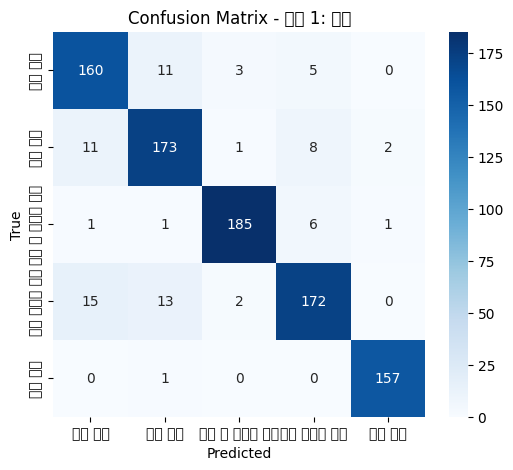

Classification Report:
              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.86      0.89      0.87       179
       Í∞àÏ∑® ÎåÄÌôî       0.87      0.89      0.88       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.97      0.95      0.96       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.90      0.85      0.88       202
       ÏùºÎ∞ò ÎåÄÌôî       0.98      0.99      0.99       158

    accuracy                           0.91       928
   macro avg       0.92      0.92      0.92       928
weighted avg       0.91      0.91      0.91       928


 Î™®Îç∏ 2: ÏõêÎ≥∏+Synonym


<ipython-input-57-48dff5dd9374>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


Confusion Matrix:
[[155  16   4   4   0]
 [  8 175   2   8   2]
 [  1   0 189   3   1]
 [ 14  14   5 168   1]
 [  0   1   1   0 156]]


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

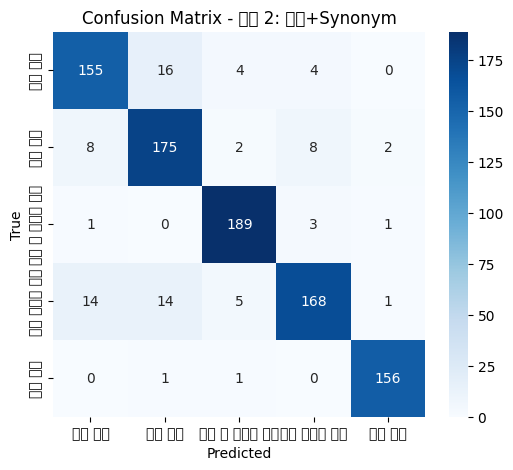

Classification Report:
              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.87      0.87      0.87       179
       Í∞àÏ∑® ÎåÄÌôî       0.85      0.90      0.87       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.94      0.97      0.96       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.92      0.83      0.87       202
       ÏùºÎ∞ò ÎåÄÌôî       0.97      0.99      0.98       158

    accuracy                           0.91       928
   macro avg       0.91      0.91      0.91       928
weighted avg       0.91      0.91      0.91       928


 Î™®Îç∏ 3: ÏõêÎ≥∏+EDA


<ipython-input-57-48dff5dd9374>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


Confusion Matrix:
[[155  13   4   7   0]
 [  8 175   2   9   1]
 [  1   0 188   4   1]
 [ 10  19   6 167   0]
 [  0   1   0   0 157]]


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

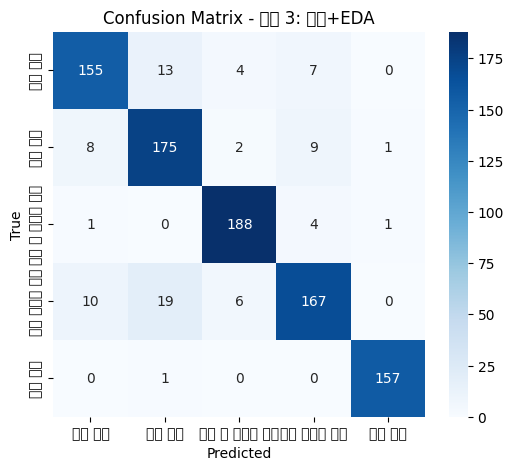

Classification Report:
              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.89      0.87      0.88       179
       Í∞àÏ∑® ÎåÄÌôî       0.84      0.90      0.87       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.94      0.97      0.95       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.89      0.83      0.86       202
       ÏùºÎ∞ò ÎåÄÌôî       0.99      0.99      0.99       158

    accuracy                           0.91       928
   macro avg       0.91      0.91      0.91       928
weighted avg       0.91      0.91      0.91       928


 Î™®Îç∏ 4: ÏõêÎ≥∏+Syn+EDA


<ipython-input-57-48dff5dd9374>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


Confusion Matrix:
[[160  10   4   5   0]
 [  9 178   1   7   0]
 [  1   0 187   5   1]
 [ 11  18   2 171   0]
 [  0   1   0   0 157]]


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

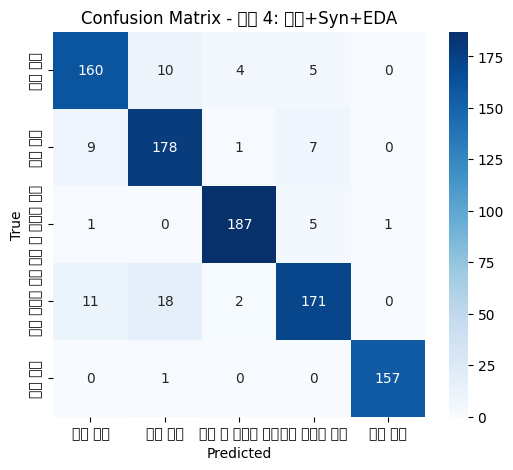

Classification Report:
              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.88      0.89      0.89       179
       Í∞àÏ∑® ÎåÄÌôî       0.86      0.91      0.89       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.96      0.96      0.96       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.91      0.85      0.88       202
       ÏùºÎ∞ò ÎåÄÌôî       0.99      0.99      0.99       158

    accuracy                           0.92       928
   macro avg       0.92      0.92      0.92       928
weighted avg       0.92      0.92      0.92       928



In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Í≤ÄÏ¶ùÏÖã Ï§ÄÎπÑ
val_df = pd.DataFrame({"text": X_val_raw.tolist(), "label": y_val})
val_dataset = Dataset.from_pandas(val_df).map(tokenize_function, batched=True)

print("\n Î™®Îç∏Î≥Ñ confusion matrix Î∞è classification report")
for i, name in enumerate(dataset_names, 1):
    print(f"\n Î™®Îç∏ {i}: {name}")

    # Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
    model_path = f"./results/model_{i}"
    model = ElectraForSequenceClassification.from_pretrained(model_path).to(device)

    # ÌèâÍ∞ÄÏö© Trainer
    trainer = Trainer(model=model, tokenizer=tokenizer)

    # ÏòàÏ∏° ÏàòÌñâ
    preds = trainer.predict(val_dataset)
    y_pred = np.argmax(preds.predictions, axis=1)
    y_true = y_val

    # confusion matrix Ï∂úÎ†•
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=ordered_columns, yticklabels=ordered_columns)
    plt.title(f"Confusion Matrix - Î™®Îç∏ {i}: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=ordered_columns))


Map:   0%|          | 0/928 [00:00<?, ? examples/s]


üîç Î™®Îç∏Î≥Ñ Confusion Matrix Î∞è Classification Report

üìä Î™®Îç∏ 1: ÏõêÎ≥∏


<ipython-input-58-6e8de357112f>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

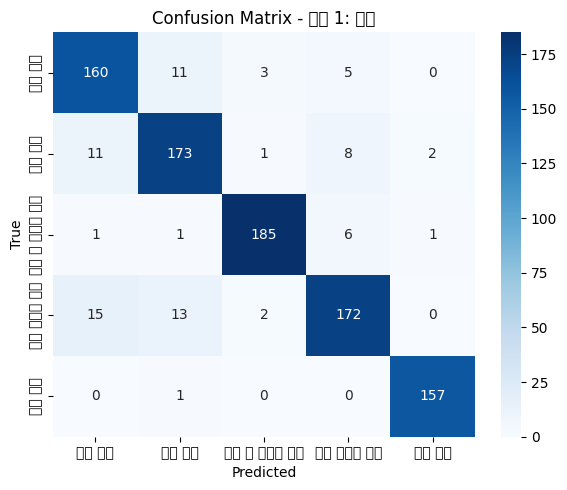

üìã Classification Report:
              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.86      0.89      0.87       179
       Í∞àÏ∑® ÎåÄÌôî       0.87      0.89      0.88       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.97      0.95      0.96       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.90      0.85      0.88       202
       ÏùºÎ∞ò ÎåÄÌôî       0.98      0.99      0.99       158

    accuracy                           0.91       928
   macro avg       0.92      0.92      0.92       928
weighted avg       0.91      0.91      0.91       928


üìä Î™®Îç∏ 2: ÏõêÎ≥∏+Synonym


<ipython-input-58-6e8de357112f>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

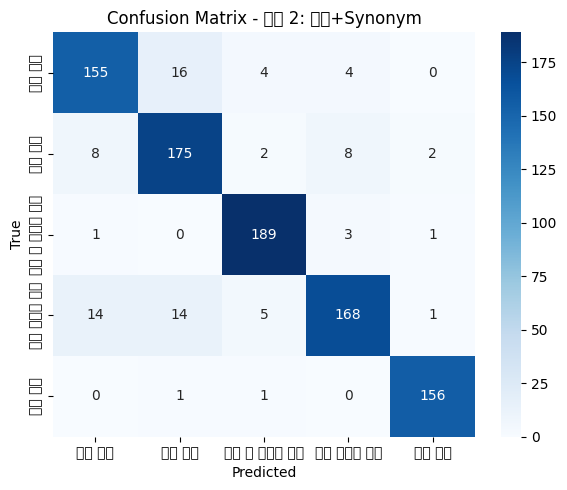

üìã Classification Report:
              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.87      0.87      0.87       179
       Í∞àÏ∑® ÎåÄÌôî       0.85      0.90      0.87       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.94      0.97      0.96       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.92      0.83      0.87       202
       ÏùºÎ∞ò ÎåÄÌôî       0.97      0.99      0.98       158

    accuracy                           0.91       928
   macro avg       0.91      0.91      0.91       928
weighted avg       0.91      0.91      0.91       928


üìä Î™®Îç∏ 3: ÏõêÎ≥∏+EDA


<ipython-input-58-6e8de357112f>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

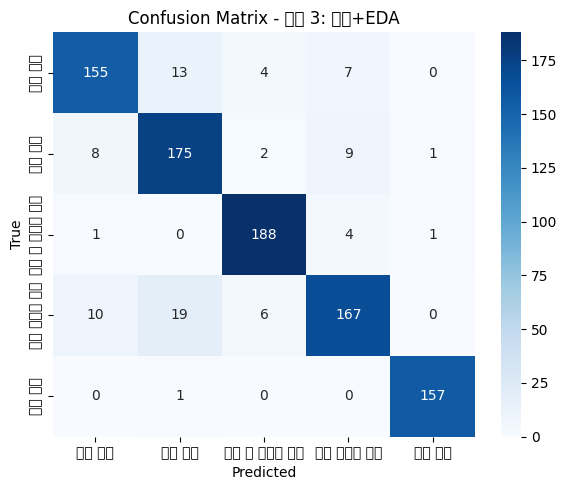

üìã Classification Report:
              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.89      0.87      0.88       179
       Í∞àÏ∑® ÎåÄÌôî       0.84      0.90      0.87       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.94      0.97      0.95       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.89      0.83      0.86       202
       ÏùºÎ∞ò ÎåÄÌôî       0.99      0.99      0.99       158

    accuracy                           0.91       928
   macro avg       0.91      0.91      0.91       928
weighted avg       0.91      0.91      0.91       928


üìä Î™®Îç∏ 4: ÏõêÎ≥∏+Synonym+EDA


<ipython-input-58-6e8de357112f>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer)


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

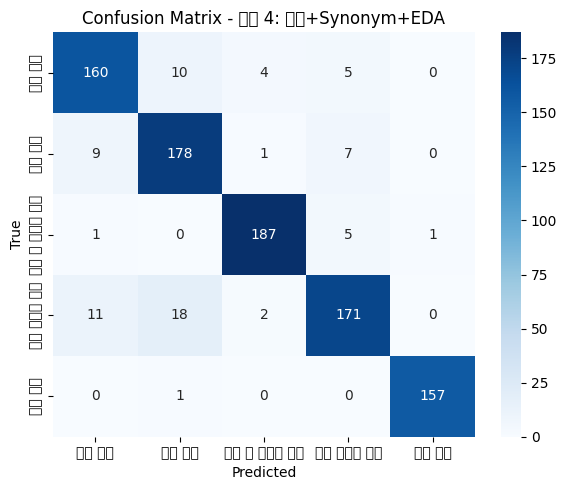

üìã Classification Report:
              precision    recall  f1-score   support

       ÌòëÎ∞ï ÎåÄÌôî       0.88      0.89      0.89       179
       Í∞àÏ∑® ÎåÄÌôî       0.86      0.91      0.89       195
 ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.96      0.96      0.96       194
   Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî       0.91      0.85      0.88       202
       ÏùºÎ∞ò ÎåÄÌôî       0.99      0.99      0.99       158

    accuracy                           0.92       928
   macro avg       0.92      0.92      0.92       928
weighted avg       0.92      0.92      0.92       928



In [58]:
# üîπ ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ (ÎùºÎ≤® ÏàúÏÑúÎåÄÎ°ú)
ordered_columns = [
    "ÌòëÎ∞ï ÎåÄÌôî",
    "Í∞àÏ∑® ÎåÄÌôî",
    "ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî",
    "Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî",
    "ÏùºÎ∞ò ÎåÄÌôî"
]

# üîπ Í≤ÄÏ¶ùÏÖã Ï§ÄÎπÑ
val_df = pd.DataFrame({"text": X_val_raw.tolist(), "label": y_val})
val_dataset = Dataset.from_pandas(val_df).map(tokenize_function, batched=True)
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask"])

# üîπ Î™®Îç∏ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏ (ÏãúÍ∞ÅÌôî Ï†úÎ™©Ïö©)
dataset_names = ["ÏõêÎ≥∏", "ÏõêÎ≥∏+Synonym", "ÏõêÎ≥∏+EDA", "ÏõêÎ≥∏+Synonym+EDA"]

# üîπ Î∞òÎ≥µ ÏàòÌñâ
print("\nüîç Î™®Îç∏Î≥Ñ Confusion Matrix Î∞è Classification Report")
for i, name in enumerate(dataset_names, 1):
    print(f"\nüìä Î™®Îç∏ {i}: {name}")

    # Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
    model_path = f"./results/model_{i}"
    model = ElectraForSequenceClassification.from_pretrained(model_path).to(device)

    # ÌèâÍ∞ÄÏö© Trainer
    trainer = Trainer(model=model, tokenizer=tokenizer)

    # ÏòàÏ∏° ÏàòÌñâ
    preds = trainer.predict(val_dataset)
    y_pred = np.argmax(preds.predictions, axis=1)
    y_true = y_val  # numpy array or list

    # üî∏ Confusion Matrix Í≥ÑÏÇ∞
    cm = confusion_matrix(y_true, y_pred)

    # üî∏ ÏãúÍ∞ÅÌôî + Ï†ÄÏû•
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=ordered_columns, yticklabels=ordered_columns)
    plt.title(f"Confusion Matrix - Î™®Îç∏ {i}: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()

    # Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÄÏû•
    img_path = f"confusion_matrix_model{i}_{name}.png"
    plt.savefig(img_path)
    plt.show()

    # üî∏ Classification Report Ï∂úÎ†•
    print("üìã Classification Report:")
    print(classification_report(y_true, y_pred, target_names=ordered_columns))

In [ ]:
df_conversations_aihub = pd.read_csv(train_paths["conversations_aihub"])
aihub_general = aihub_df[aihub_df['class'] == 'ÏùºÎ∞ò ÎåÄÌôî'].copy()

# 2. Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 'ÏùºÎ∞ò ÎåÄÌôî' Ï†úÍ±∞
def filter_non_general(X, y):
    X_filtered = [x for x, label in zip(X, y) if label != custom_label_order['ÏùºÎ∞ò ÎåÄÌôî']]
    y_filtered = [label for label in y if label != custom_label_order['ÏùºÎ∞ò ÎåÄÌôî']]
    return X_filtered, y_filtered

X1_filtered, y1_filtered = filter_non_general(X1, y1)
X_syn_filtered, y_syn_filtered = filter_non_general(X_syn_only, y_syn_only)
X_eda_filtered, y_eda_filtered = filter_non_general(X_eda_only, y_eda_only)

X_general = aihub_general['conversation'].tolist()
y_general = aihub_general['class'].map(custom_label_order).values

# 4. ÏµúÏ¢Ö X5, y5 Íµ¨ÏÑ±
X5 = X1_filtered + X_syn_filtered + X_eda_filtered + X_general
y5 = np.concatenate([y1_filtered, y_syn_filtered, y_eda_filtered, y_general])

# 5. ÌôïÏù∏
print(f"X5 ÏÉòÌîå Ïàò: {len(X5)}")
print(f"y5 ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨: {np.unique(y5, return_counts=True)}")

# ÌÖçÏä§Ìä∏ÏôÄ ÎùºÎ≤® Ï∂îÏ∂ú
X_general = aihub_general['conversation'].tolist()
y_general = aihub_general['class'].map(custom_label_order).values

# Í∏∞Ï°¥ Ï¶ùÍ∞ïÍπåÏßÄ Ìè¨Ìï®Ìïú X4, y4Ïóê ÏùºÎ∞òÎåÄÌôî Ï∂îÍ∞Ä ‚Üí X5, y5 ÏÉùÏÑ±
X5 = X4 + X_general
y5 = np.concatenate([y4, y_general])

# Í≤∞Í≥º ÌôïÏù∏
print(f"ÏµúÏ¢Ö ÏÉòÌîå Ïàò X5: {len(X5)}, y5: {len(y5)}")
print(f"X5 ÏÉòÌîå:\n{X5[:2]}")
print(f"y5 ÏÉòÌîå:\n{y5[:2]}")

+ Îç∞Ïù¥ÌÑ∞ EDA Îïå ÏòàÏÉÅÌïú ÎåÄÎ°ú ÏùºÎ∞òÎåÄÌôîÏóê ÎßéÏù¥ Í≥ºÏ†ÅÌï©ÎêòÏóàÏúºÎ©∞ ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôîÎäî Ï†êÏàòÍ∞Ä ÎÜíÏùå
+ ÎÇòÎ®∏ÏßÄ ÏÑ∏ Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÎåÄÌï¥ÏÑúÎäî ÏïÑÏâ¨Ïö¥ ÏÑ±Îä•

## submission

In [ ]:
test_csv_path = os.path.join(csv_dir, 'test.csv')

df_test = pd.read_csv(test_csv_path)
conversations_test = df_test['text'].to_list()

X_text = preprocessing(conversations_test, tokenizer, INPUT_MAX_LENGTH)

In [ ]:
# Î™®Îç∏ ÏòàÏ∏° (SoftmaxÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌôïÎ•† Í≥ÑÏÇ∞)
predictions = model.predict(X_text)

# ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌÅ¥ÎûòÏä§ Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôò
predicted_classes = predictions.argmax(axis=1)

In [ ]:
# idÏôÄ ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ Ï†ÄÏû•
submission_df = pd.DataFrame({
    'idx': df_test['idx'],
    'class': predicted_classes
})

display(submission_df)

# submission.csvÎ°ú Ï†ÄÏû•
submission_df.to_csv('/content/submission.csv', index=False)

## Ï†úÏ∂ú Í≤∞Í≥º